# Creating the Model

In [1]:
import pandas as pd

In [ ]:
# Loading the preprocessed data for the model

data = pd.read_pickle("preprocessed_segmentation.pkl")
data.head()

,Quantity,UnitPrice,CustomerAge,SpendingScore,TotalSales,Month,Week,Country_France,Country_Germany,Country_Netherlands,Country_Spain,Country_United Kingdom,StockCode_A,StockCode_B,StockCode_C,StockCode_D,StockCode_E
0,6.0,35.17,67.0,4.0,211.02,1,1,False,False,False,True,False,True,False,False,False,False
2,46.0,93.70,62.0,63.0,4310.20,1,1,False,False,True,False,False,False,True,False,False,False
3,79.0,73.65,55.0,42.0,5818.35,1,1,False,False,False,True,False,False,False,False,False,True
5,33.0,16.70,40.0,13.0,551.10,1,1,False,False,False,True,False,False,False,True,False,False
6,79.0,15.36,35.0,46.0,1213.44,1,1,False,True,False,False,False,False,True,False,False,False


In [3]:
# scaling the features
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
scaled_data = rs.fit_transform(data)

# Elbow Curve method for optimal K value

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


c:\Users\pandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
c:\Users\pandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
c:\Users\pandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
c:\Users\pandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Win

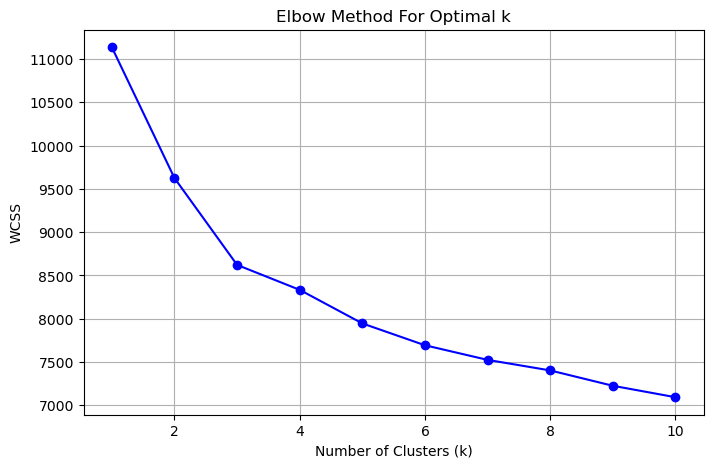

In [5]:
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


From the elbow method, the optimal value of 'K' seems to be 7

In [6]:
# Clustering the data using kmeans with the optimal k value

kmeans_clustering = KMeans(n_clusters=7, random_state=42)
kmeans_clustering.fit(scaled_data)
data['Cluster'] = kmeans_clustering.labels_

c:\Users\pandi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


# Plotting the clusters

In [ ]:
# Converting the multi-dimension values into two dimensions using pca
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]


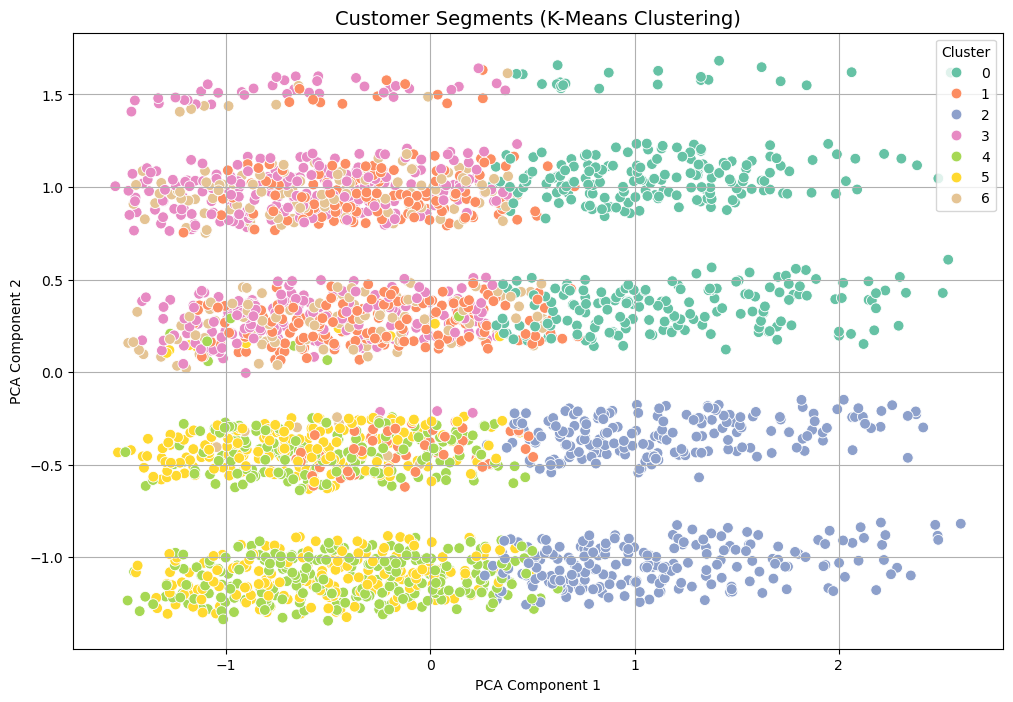

In [12]:
# plotting the clustered values

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segments (K-Means Clustering)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Interpreting the cluster values

In [18]:
data['Cluster'].value_counts()


Cluster
3    461
4    425
2    416
5    403
0    376
1    372
6    251
Name: count, dtype: int64

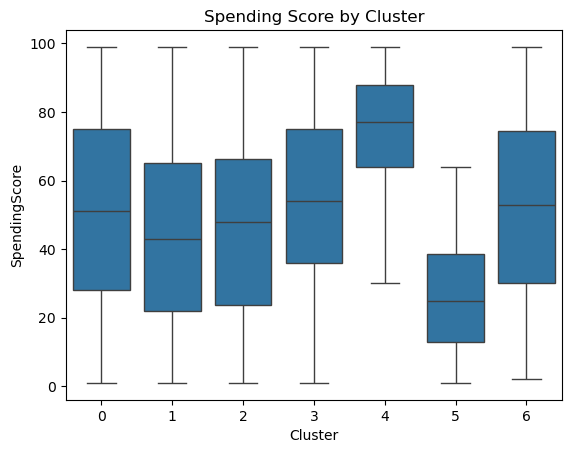

In [19]:

# Boxplot of spending score per cluster
sns.boxplot(x='Cluster', y='SpendingScore', data=data)
plt.title("Spending Score by Cluster")
plt.show()


From the boxplot we can infer that cluster 4 has a higher spending score when compared to others
